# Smokers-EDA+Catboost



https://drive.google.com/file/d/1XQ7LqTk9uP4lbu4wR9w0KnKF8qvv2XsE


**Цель данного эссе** — разработка модели машинного обучения для идентификации курильщиков среди всех представленных в выборке людей. Модель должна эффективно разделять individuals на две категории — курящие и некурящие — на основе предоставленных медицинских и демографических признаков."


**"Цель исследовательского анализа** — комплексное исследование признаков перед построением модели с выявлением их прогностической значимости. В процессе предстоит обнаружить интересные закономерности в данных, построить  визуализации и сформулировать выводы о взаимосвязях между характеристиками человека и наличием привычки к курению. Это позволит  читателю сформировать представление о данных и их взаимосвязи с наличием привычки курения

## Знакомство с данными 


**Описание датасета** 

Этот набор данных представляет собой набор основных данных о клинических показателях людей. Цель состоит в том, чтобы определить, курит человек или нет, на основании показателей.

**Описание столбцов (параметров объекта)**:

- ID - уникальный номер записи (наблюдения)
- age - возраст
- height(cm) - рост
- weight(kg) - вес
- waist(cm) - длина окружность талии
- eyesight(left) - зрение на левом глазу
- eyesight(right) - зрение на правом глазу
- hearing(left) - слышимость левого уха
- hearing(right) - слышимость правого уха
- systolic - систолическое артериальное давление
- relaxation - диастолическое артериальное давление
- fasting blood sugar - тест на сахар в крови натощак
- Cholesterol - холестерин
- triglyceride - триглицерид
- HDL - холестерин липопротеинов высокой плотности
- LDL - липопротеины низкой плотности
- hemoglobin - гемоглобин
- Urine protein - белок в моче
- serum creatinine
- AST - Аспартатаминотрансфераза
- ALT - Аланинаминотрансфераза
- Gtp - Гамма‑глютамилтранспептидаза
- oral
- dental caries - кариес
- tartar - зубной камень
- smoking - курит человек, или нет. Целевой признак


**Файлы**

train.csv - выборка для обучения и валидации модели

test.csv - выборка, на которой нужно предсказать цены и загрузить на Кагл

In [6]:
!pip install jupyter-black - q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 769.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.6 MB/s eta 0:00:0000:0100:01


In [52]:
# помощник писать код
import jupyter_black

jupyter_black.load()

# импорты основных библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import (
    classification_report,
    PrecisionRecallDisplay,
    RocCurveDisplay,
)


import warnings

# поможет раскрасить датафрейм
from matplotlib.colors import LinearSegmentedColormap

In [31]:
# Скроем лишние предупреждения
warnings.filterwarnings("ignore")
# Настройки Pandas для вывода всех столбцов
pd.set_option("display.max_columns", None)
# улучшение четкости изображения графиков
%config InlineBackend.figure_format = 'retina'

In [32]:
!gdown 1XQ7LqTk9uP4lbu4wR9w0KnKF8qvv2XsE

Downloading...
From: https://drive.google.com/uc?id=1XQ7LqTk9uP4lbu4wR9w0KnKF8qvv2XsE
To: /home/jovyan/work/ipynb/leopard-challenge-classification.zip
100%|████████████████████████████████████████| 639k/639k [00:00<00:00, 1.90MB/s]


In [33]:
!unzip leopard-challenge-classification.zip

Archive:  leopard-challenge-classification.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [34]:
# чтениек датасета
try:
    train = pd.read_csv("/home/jovyan/work/data/train.csv")
except:
    train = pd.read_csv("../data/train.csv")

In [35]:
train.head(10)

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1
5,7918,55,155,50,70.1,1.0,1.5,1.0,1.0,109.0,67.0,85.0,165.0,74.0,58.0,92.0,14.6,1.0,0.9,26.0,18.0,16.0,Y,0,N,0
6,2,40,160,50,65.4,1.2,0.8,1.0,1.0,114.0,72.0,79.0,205.0,36.0,94.0,104.0,16.1,1.0,1.0,17.0,13.0,37.0,Y,0,Y,1
7,15938,40,170,70,85.0,1.0,1.0,1.0,1.0,119.0,72.0,94.0,165.0,116.0,60.0,82.0,16.1,1.0,1.1,19.0,18.0,23.0,Y,0,N,0
8,10417,35,180,85,81.0,1.0,0.9,1.0,1.0,120.0,80.0,94.0,197.0,38.0,60.0,129.0,14.7,1.0,0.9,28.0,30.0,25.0,Y,0,N,0
9,19048,55,165,65,84.6,1.0,1.0,1.0,1.0,138.0,82.0,202.0,224.0,130.0,60.0,138.0,16.4,1.0,0.9,21.0,22.0,31.0,Y,0,Y,0


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13863 entries, 0 to 13862
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   13863 non-null  int64  
 1   age                  13863 non-null  int64  
 2   height(cm)           13863 non-null  int64  
 3   weight(kg)           13863 non-null  int64  
 4   waist(cm)            13863 non-null  float64
 5   eyesight(left)       13863 non-null  float64
 6   eyesight(right)      13863 non-null  float64
 7   hearing(left)        13863 non-null  float64
 8   hearing(right)       13863 non-null  float64
 9   systolic             13863 non-null  float64
 10  relaxation           13863 non-null  float64
 11  fasting blood sugar  13863 non-null  float64
 12  Cholesterol          13863 non-null  float64
 13  triglyceride         13863 non-null  float64
 14  HDL                  13863 non-null  float64
 15  LDL                  13863 non-null 

In [37]:
train.columns = train.columns.str.lower()

In [38]:
try:
    test = pd.read_csv("/home/jovyan/work/data/test.csv")
except:
    test = pd.read_csv("../data/test.csv")

In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5942 entries, 0 to 5941
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5942 non-null   int64  
 1   age                  5942 non-null   int64  
 2   height(cm)           5942 non-null   int64  
 3   weight(kg)           5942 non-null   int64  
 4   waist(cm)            5942 non-null   float64
 5   eyesight(left)       5942 non-null   float64
 6   eyesight(right)      5942 non-null   float64
 7   hearing(left)        5942 non-null   float64
 8   hearing(right)       5942 non-null   float64
 9   systolic             5942 non-null   float64
 10  relaxation           5942 non-null   float64
 11  fasting blood sugar  5942 non-null   float64
 12  Cholesterol          5942 non-null   float64
 13  triglyceride         5942 non-null   float64
 14  HDL                  5942 non-null   float64
 15  LDL                  5942 non-null   f

In [40]:
test.columns = test.columns.str.lower()

In [ ]:
train = train.rename(
    columns={
        "fasting blood sugar": "fasting_blood_sugar",
        "urine protein": "urine_protein",
        "serum creatinine": "serum_creatinine",
        "dental caries": "dental_caries",
    }
)
test = test.rename(
    columns={
        "fasting blood sugar": "fasting_blood_sugar",
        "urine protein": "urine_protein",
        "serum creatinine": "serum_creatinine",
        "dental caries": "dental_caries",
    }
)

In [42]:
cols = train.columns.to_list()

for col in cols:
    print(f"Признак: {col}, пропуски: {train[col].isnull().sum()}")

Признак: id, пропуски: 0
Признак: age, пропуски: 0
Признак: height(cm), пропуски: 0
Признак: weight(kg), пропуски: 0
Признак: waist(cm), пропуски: 0
Признак: eyesight(left), пропуски: 0
Признак: eyesight(right), пропуски: 0
Признак: hearing(left), пропуски: 0
Признак: hearing(right), пропуски: 0
Признак: systolic, пропуски: 0
Признак: relaxation, пропуски: 0
Признак: fasting_blood_sugar, пропуски: 0
Признак: cholesterol, пропуски: 0
Признак: triglyceride, пропуски: 0
Признак: hdl, пропуски: 0
Признак: ldl, пропуски: 0
Признак: hemoglobin, пропуски: 0
Признак: urine_protein, пропуски: 0
Признак: serum_creatinine, пропуски: 0
Признак: ast, пропуски: 0
Признак: alt, пропуски: 0
Признак: gtp, пропуски: 0
Признак: oral, пропуски: 0
Признак: dental_caries, пропуски: 0
Признак: tartar, пропуски: 0
Признак: smoking, пропуски: 0


## Исследовательский анализ данных EDA

**Цель анализа:**

Провести исследовательский анализ данных (EDA), чтобы изучить структуру датасета, выявить закономерности, очистить и подготовить данные для построения модели машинного обучения, предсказывающей признак `"smoking"`.

В данных для исследования нет пропусков. Проверим признаки на соответствие типов и дубликаты.

Крайне важно проверить количество выбросов (если таковые имеются), которые могут присутствовать в любом наборе данных. Это помогает обрабатывать их для получения данных хорошего качества и повышения производительности модели.

In [43]:
display(train["oral"].value_counts())
test["oral"].value_counts()

oral
Y    13863
Name: count, dtype: int64

oral
Y    5942
Name: count, dtype: int64

Признак нам не понадобится для исследования, так как у него отсутсвует описание в данных и ему присвоено одно значение "Y" для всех наблюдений.

У признака tartar поменяем значение на Y на 1, N на 0


In [44]:
train["tartar"] = train["tartar"].replace({"Y": 1, "N": 0})
test["tartar"] = test["tartar"].replace({"Y": 1, "N": 0})

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13863 entries, 0 to 13862
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   13863 non-null  int64  
 1   age                  13863 non-null  int64  
 2   height(cm)           13863 non-null  int64  
 3   weight(kg)           13863 non-null  int64  
 4   waist(cm)            13863 non-null  float64
 5   eyesight(left)       13863 non-null  float64
 6   eyesight(right)      13863 non-null  float64
 7   hearing(left)        13863 non-null  float64
 8   hearing(right)       13863 non-null  float64
 9   systolic             13863 non-null  float64
 10  relaxation           13863 non-null  float64
 11  fasting_blood_sugar  13863 non-null  float64
 12  cholesterol          13863 non-null  float64
 13  triglyceride         13863 non-null  float64
 14  hdl                  13863 non-null  float64
 15  ldl                  13863 non-null 

### Пропуски и выбросы

In [46]:
def count_outliers(df):
    """
    Функция анализирует выбросы в числовых столбцах DataFrame,
    используя метод межквартильного размаха (IQR).
    Возвращает DataFrame с количеством и процентом выбросов.
    """
    numeric_cols = df.select_dtypes(include=["number"]).columns

    features, lower_outliers, upper_outliers = [], [], []

    for col in numeric_cols:
        q1, q3 = df[col].quantile([0.25, 0.75])
        iqr = q3 - q1
        lower_limit, upper_limit = q1 - 1.5 * iqr, q3 + 1.5 * iqr

        lower_count = (df[col] < lower_limit).sum()
        upper_count = (df[col] > upper_limit).sum()

        if lower_count > 0 or upper_count > 0:
            features.append(col)
            lower_outliers.append(lower_count)
            upper_outliers.append(upper_count)

    if features:
        return pd.DataFrame(
            {
                "variables": features,
                "lower_outliers": lower_outliers,
                "upper_outliers": upper_outliers,
                "lower_outliers%": [
                    round(x / len(df) * 100, 2) for x in lower_outliers
                ],
                "upper_outliers%": [
                    round(x / len(df) * 100, 2) for x in upper_outliers
                ],
            }
        )

    return None

In [47]:
print("Число дубликатов наблюдений: ", train.duplicated().sum())
len(train)

Число дубликатов наблюдений:  0


13863

In [48]:
count_outliers(train)

,variables,lower_outliers,upper_outliers,lower_outliers%,upper_outliers%
0,age,0,8,0.00,0.06
1,height(cm),2,0,0.01,0.00
2,weight(kg),5,143,0.04,1.03
3,waist(cm),21,166,0.15,1.20
4,eyesight(left),186,159,1.34,1.15
5,eyesight(right),187,158,1.35,1.14
6,hearing(left),0,389,0.00,2.81
7,hearing(right),0,380,0.00,2.74
8,systolic,43,197,0.31,1.42
9,relaxation,7,118,0.05,0.85


In [49]:
# серый стиль оформления и убираем предупреждения
sns.set_style("darkgrid")
sns.set_palette("twilight_r")

# Игнорировать все предупреждения
warnings.filterwarnings("ignore")

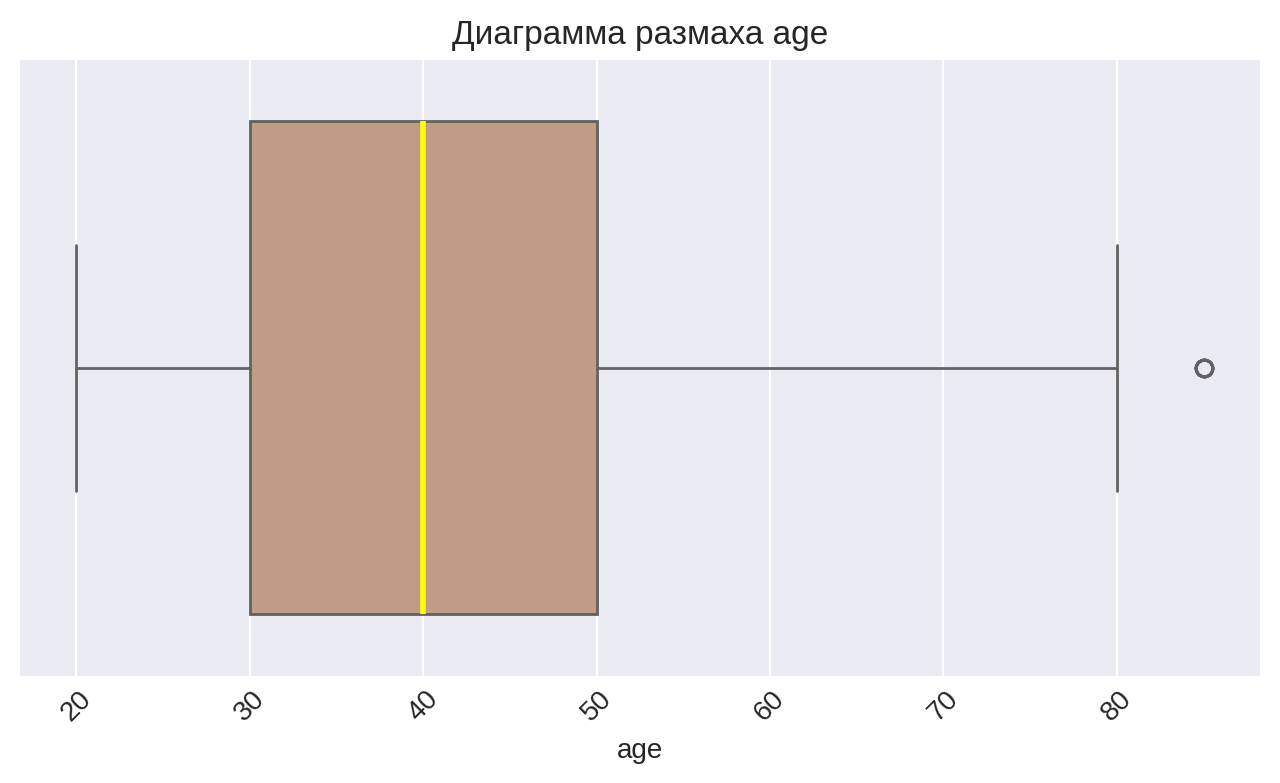

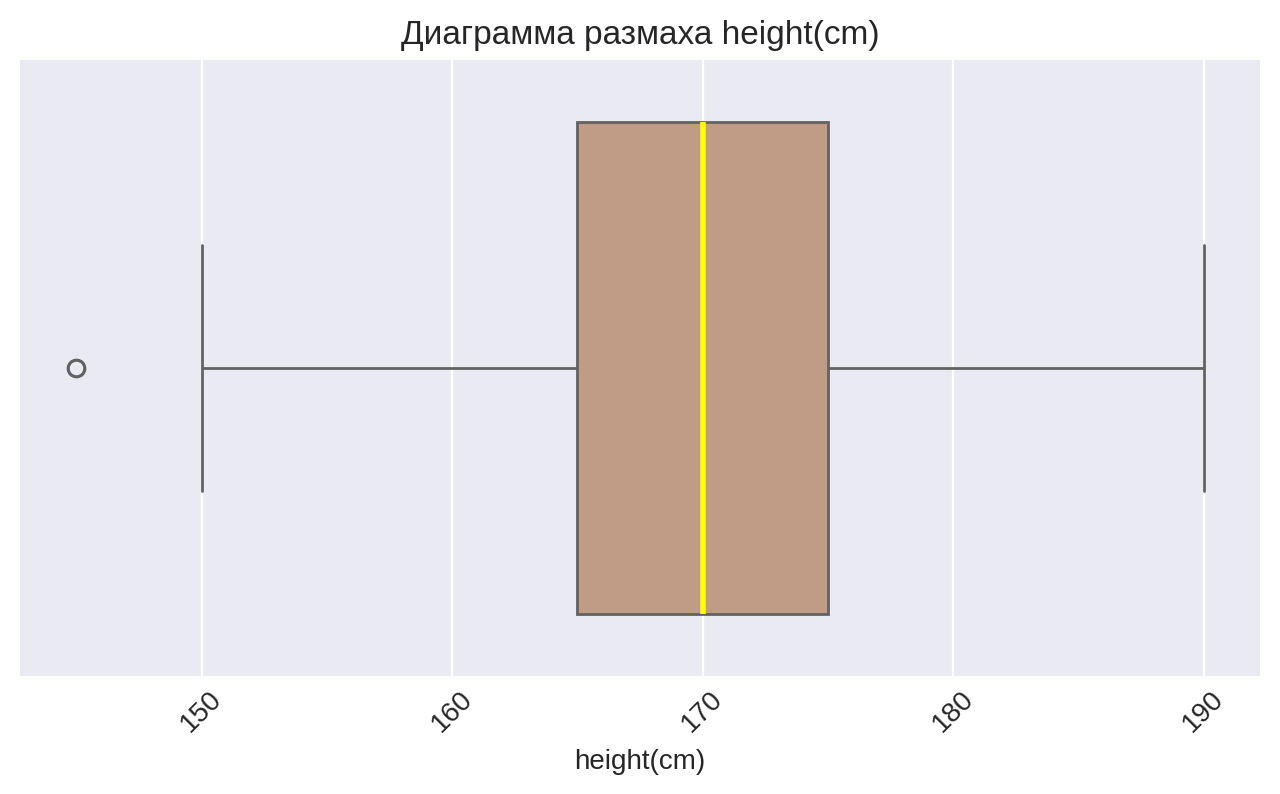

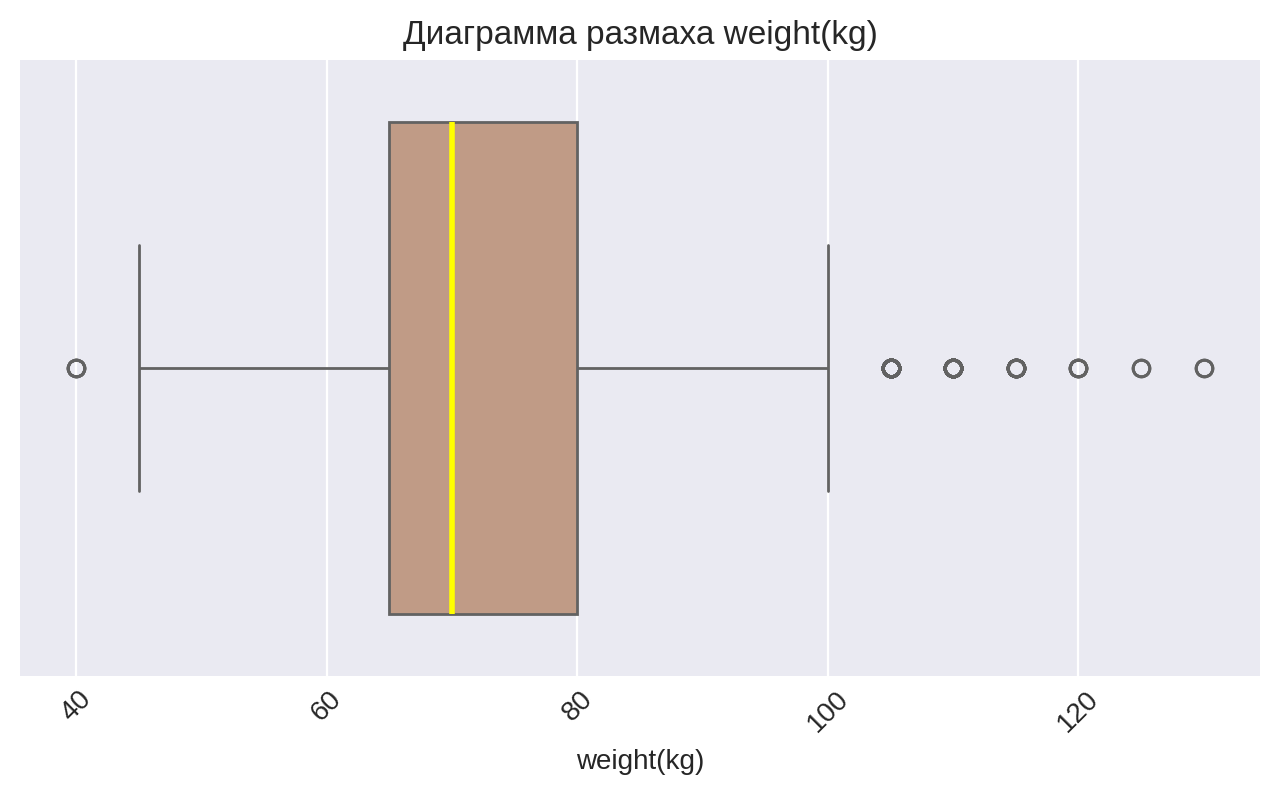

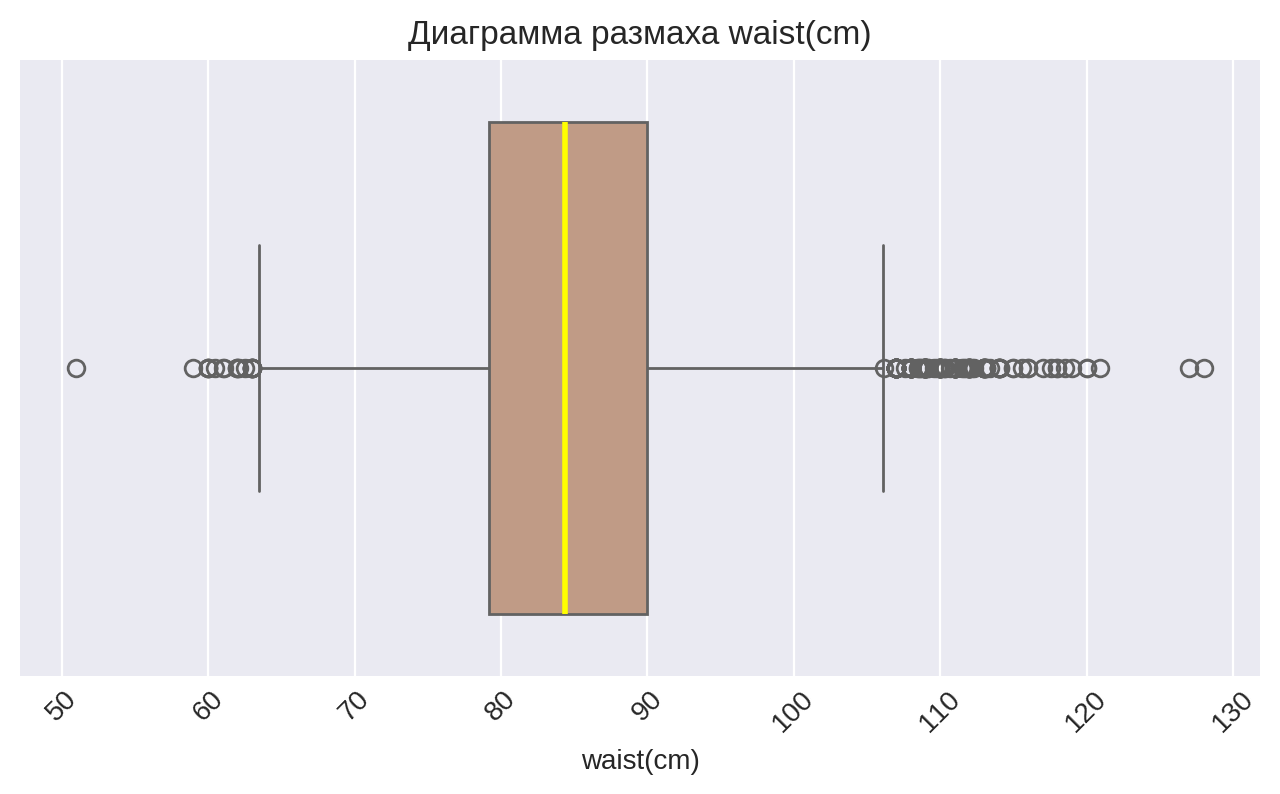

In [53]:
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("twilight_r")
for col in ["age", "height(cm)", "weight(kg)", "waist(cm)"]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train[col], medianprops={"color": "yellow", "linewidth": 2})
    plt.title(f"Диаграмма размаха {col}")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

### Анализ целевого признака `smoking`

In [54]:
train["smoking"].value_counts(normalize=True)

smoking
0    0.798024
1    0.201976
Name: proportion, dtype: float64

In [55]:
train["dental_caries"].value_counts()

dental_caries
0    10923
1     2940
Name: count, dtype: int64

Сразу бросается в глаза наблюдение, что в рассматриваемом датасете соотношение курильщиков и людей с кариесом имеют одинаковое значение ~ 20%

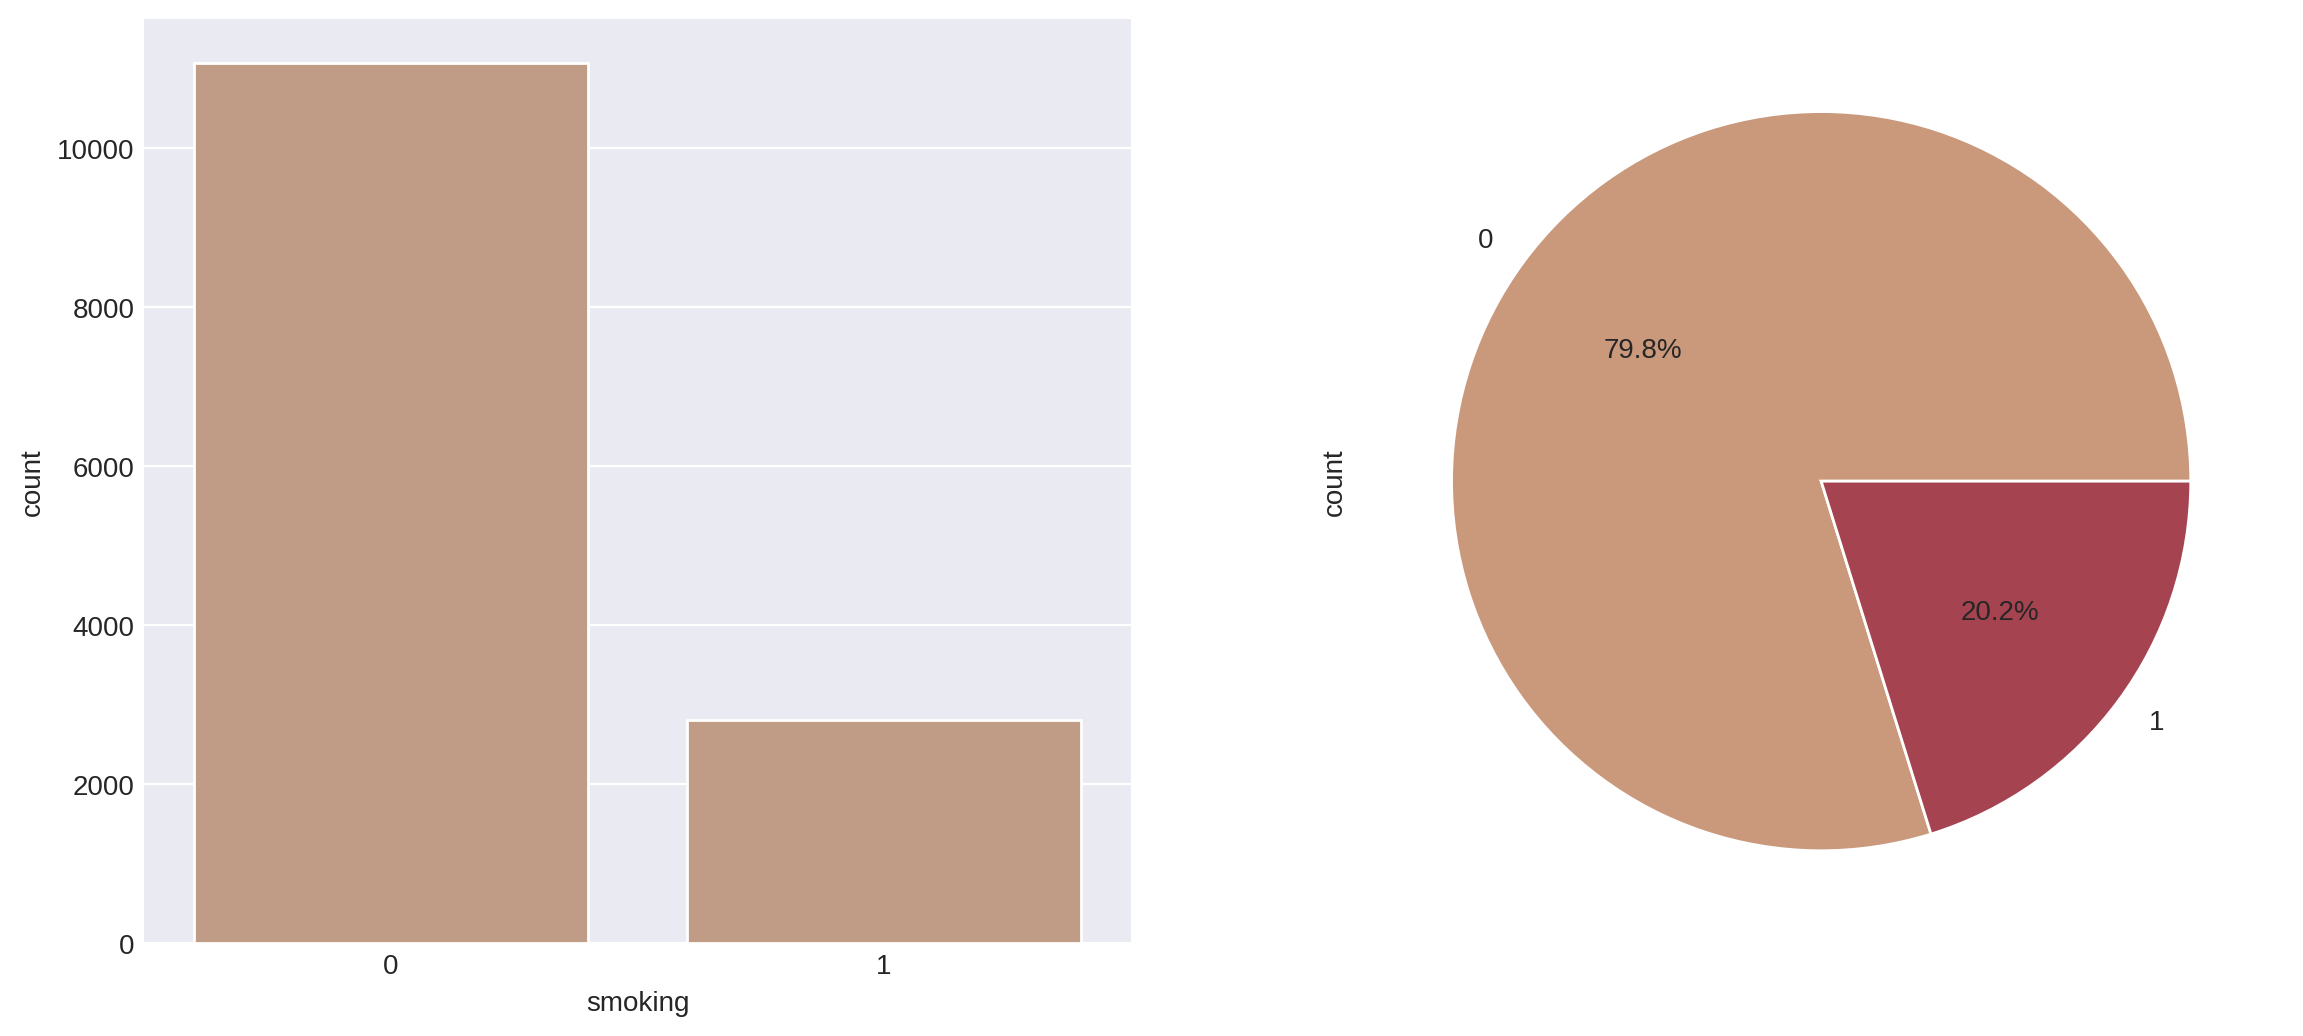

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x=train["smoking"], ax=ax[0])
train["smoking"].value_counts().plot(kind="pie", autopct="%1.1f%%", ax=ax[1])
plt.show()

smoke_1 = train[train["smoking"] == 1].shape[0]
smoke_0 = train[train["smoking"] == 0].shape[0]